In [4]:
import sys
import os
sys.path.append('../scripts')

from data_generation import LineGenerator, DatasetGenerator, Visualizer, test_line_generation, generate_and_visualize_dataset
import matplotlib.pyplot as plt
import numpy as np

Testing different line types...


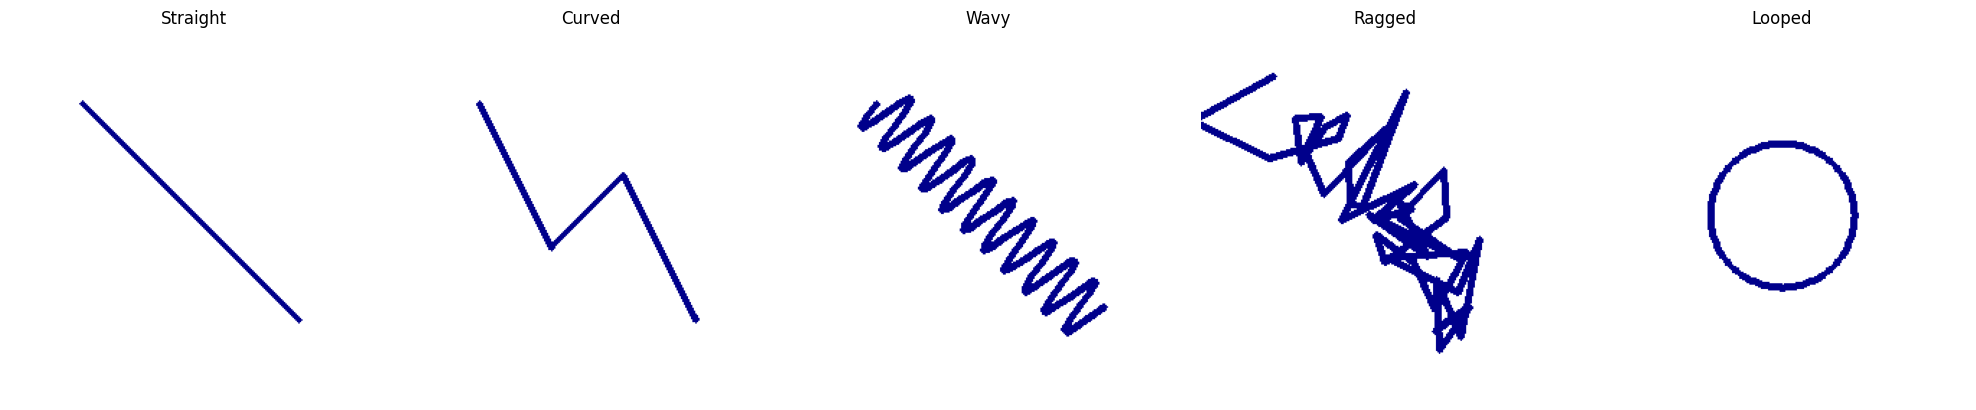

In [ ]:
print("Testing different line types...")
test_line_generation()


Generating complete dataset...
Generating mixed dataset...
Generated 120 samples

Visualizing line types at 0°...


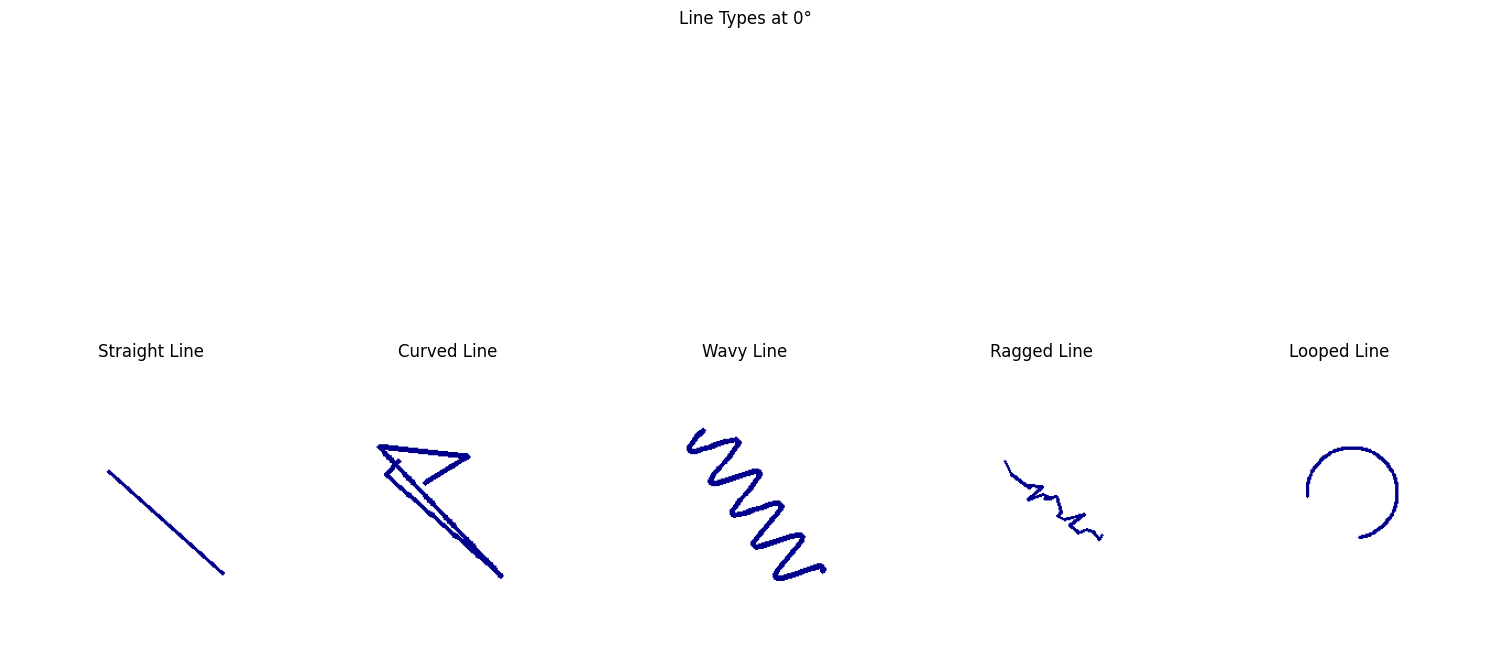


Visualizing straight line rotations...


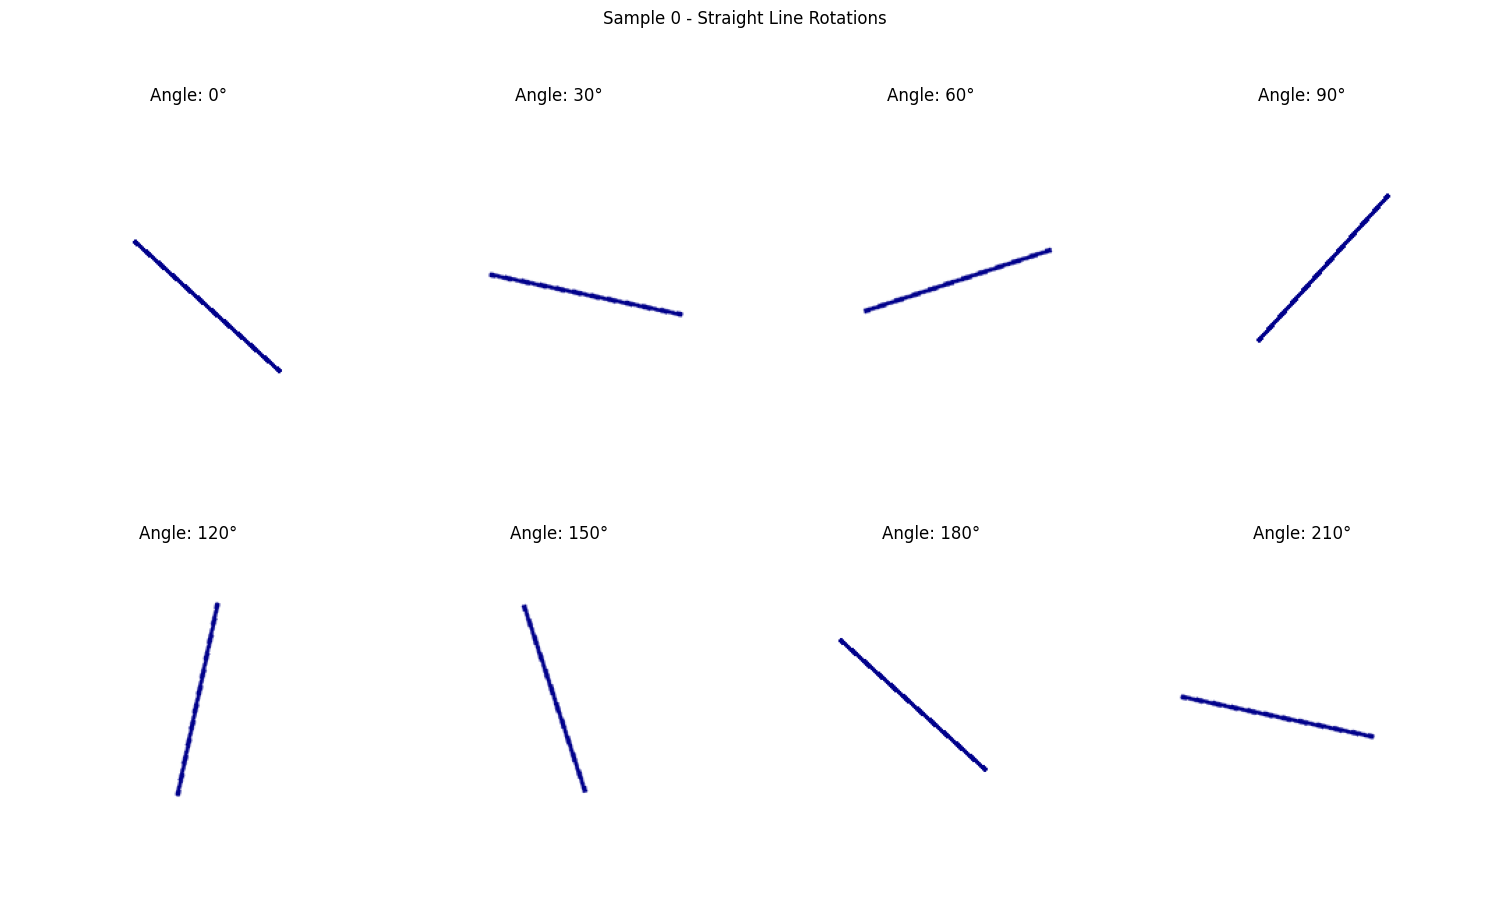


Visualizing curved line rotations...


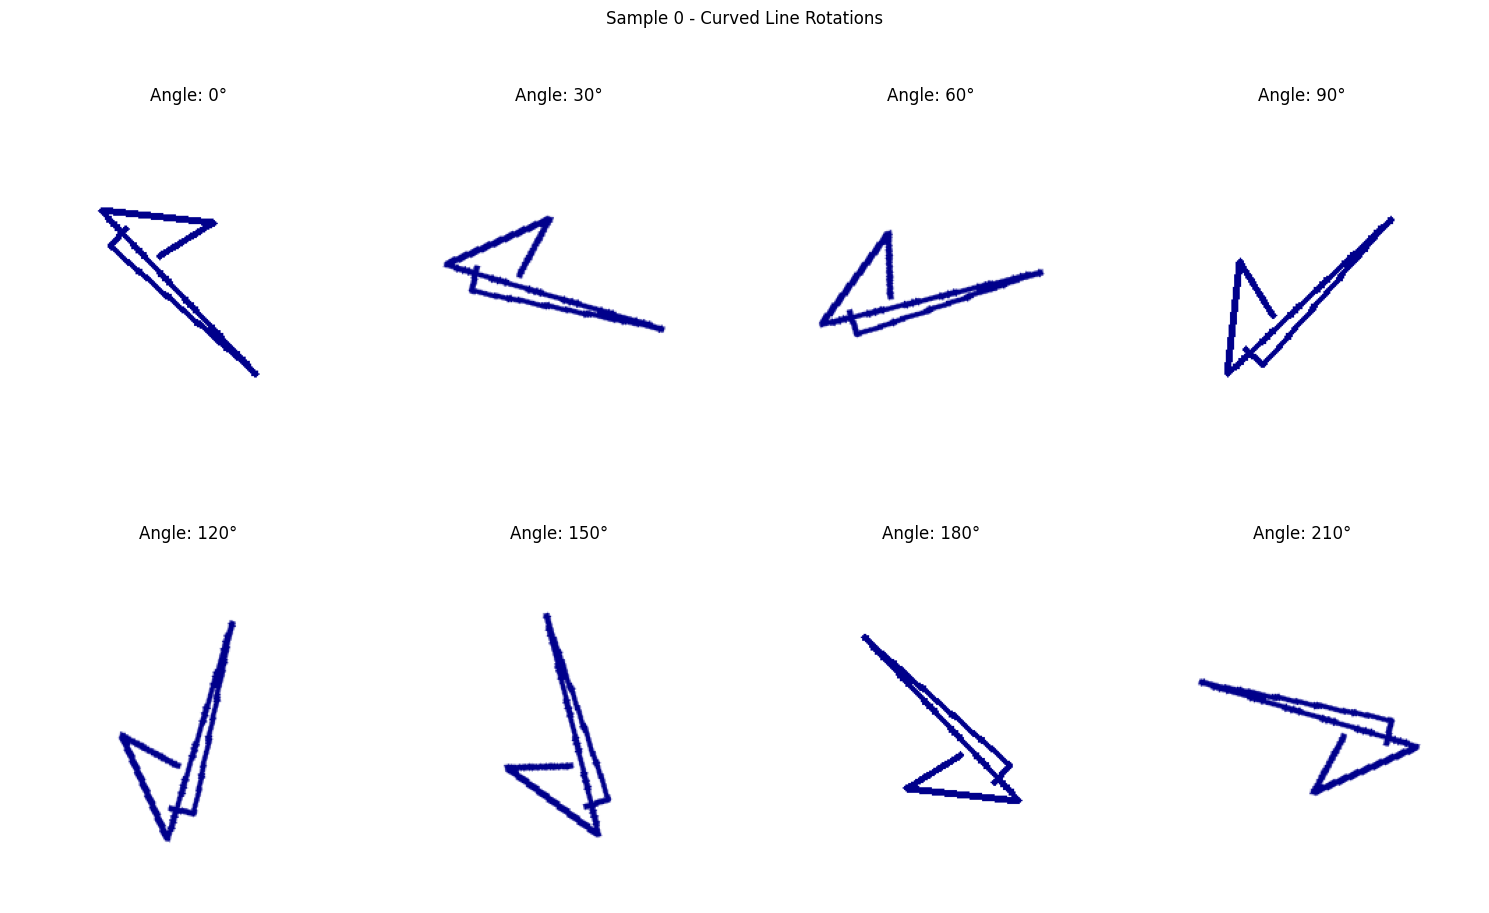


Visualizing wavy line rotations...


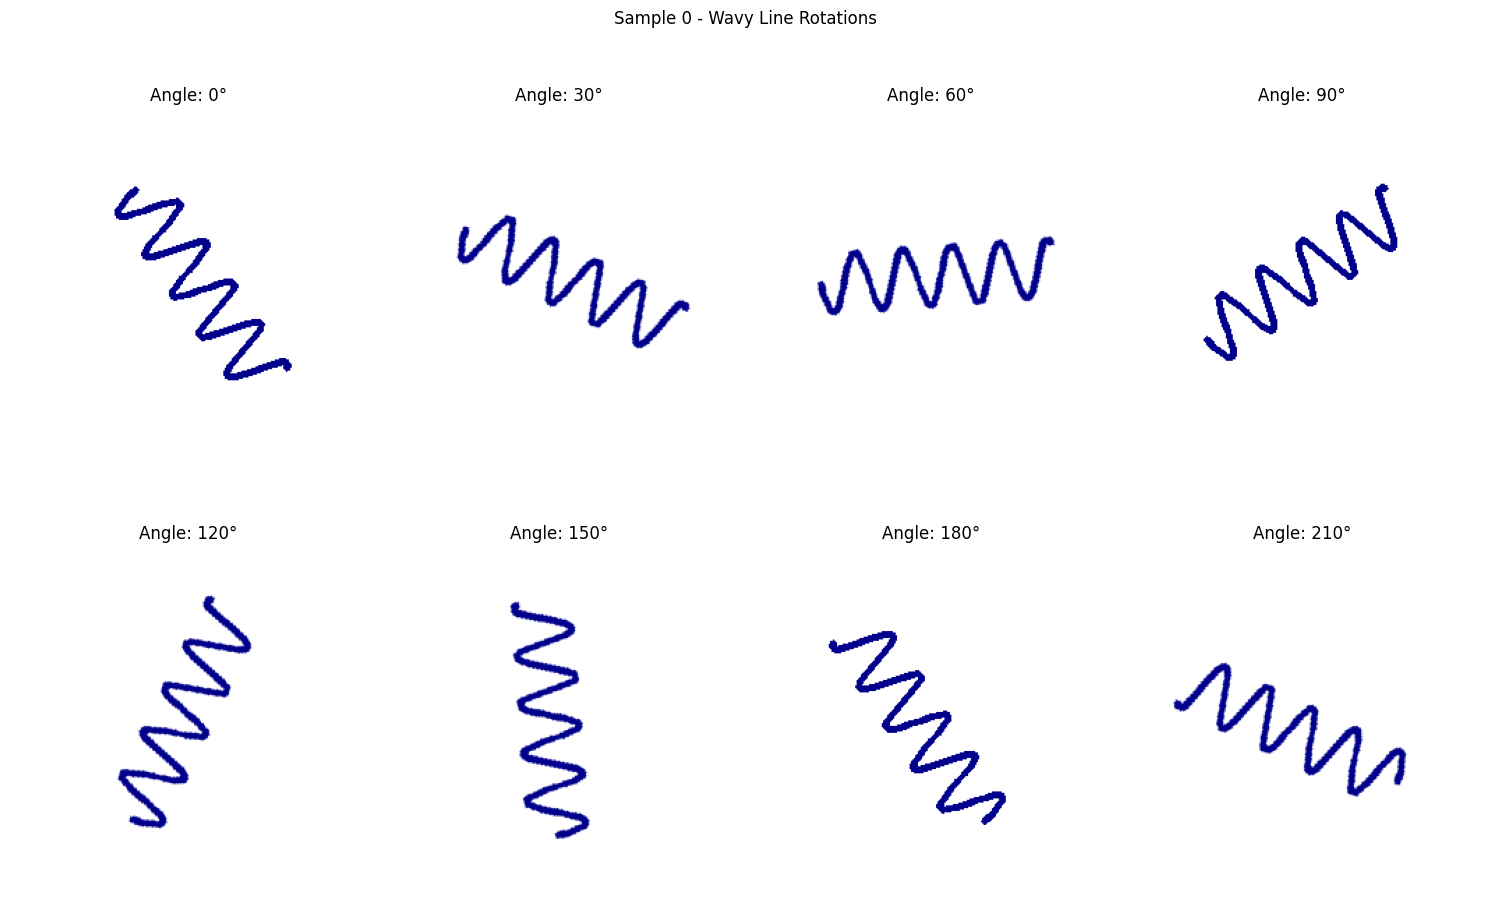


Visualizing ragged line rotations...


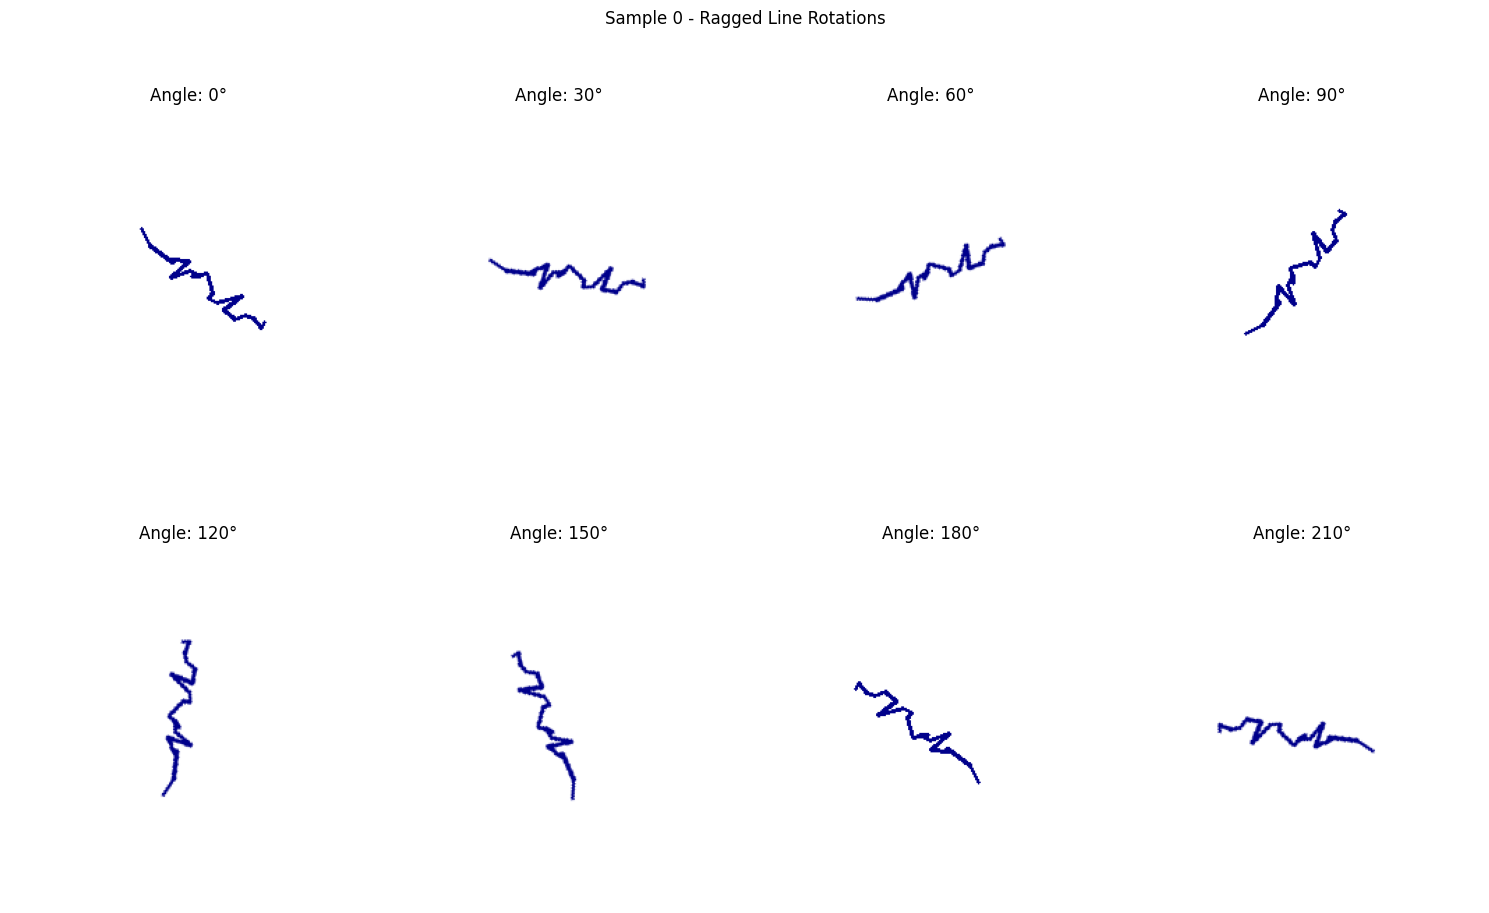


Visualizing looped line rotations...


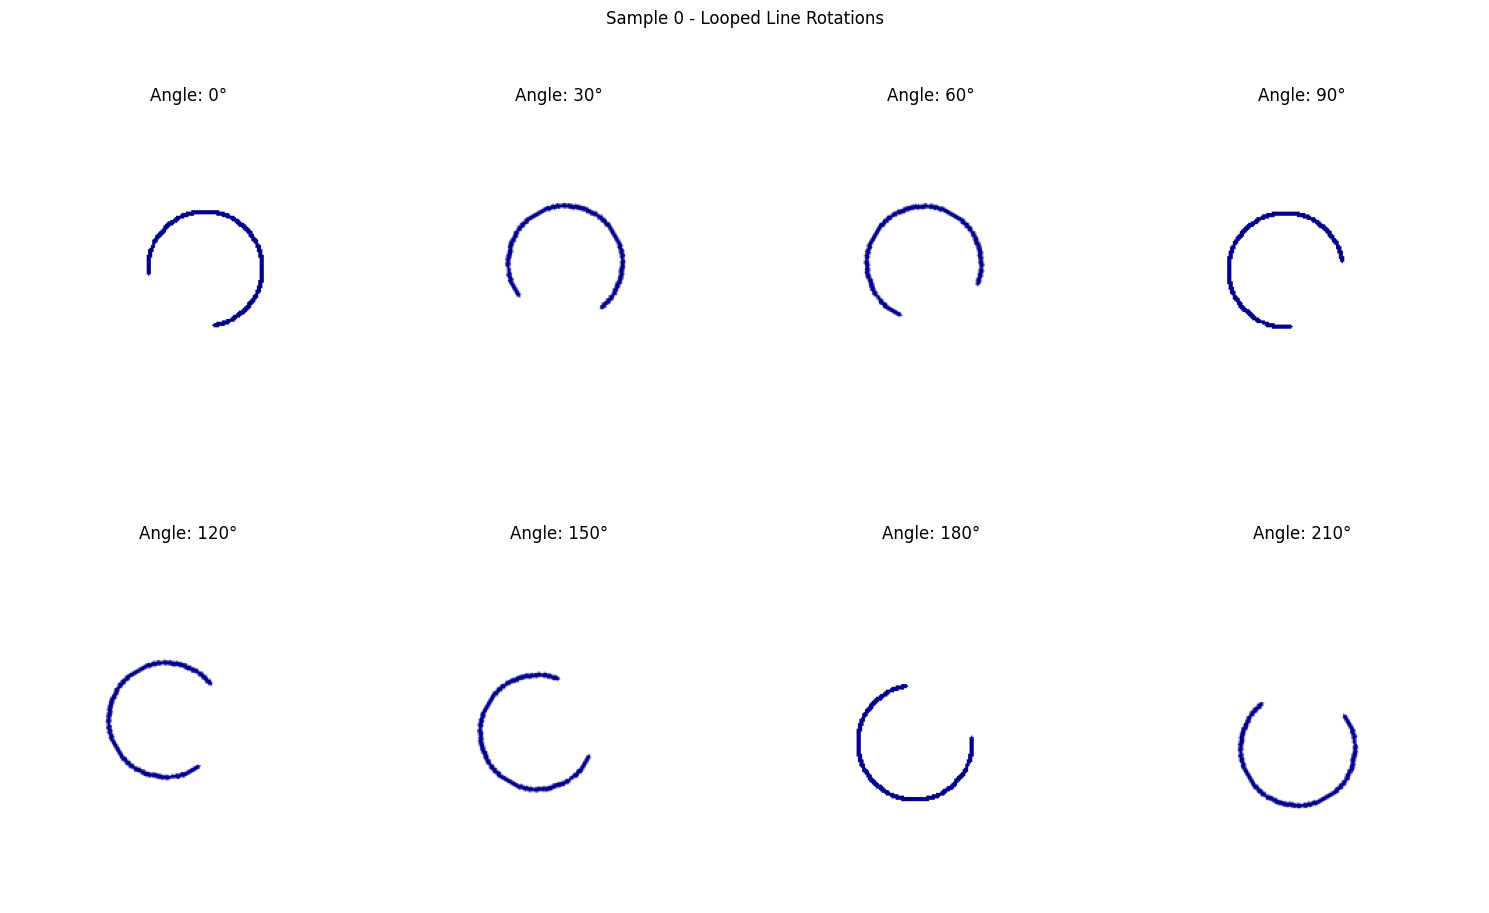


Testing overlay comparison...


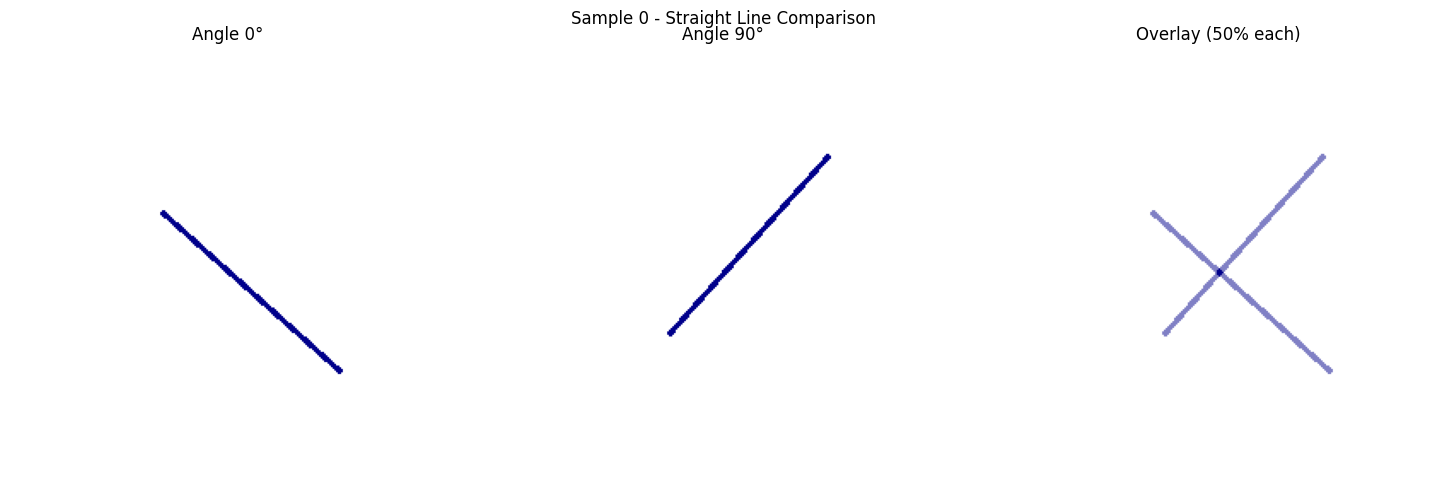

In [6]:
# Generate a complete dataset with all line types and rotations
print("Generating complete dataset...")
dataset = generate_and_visualize_dataset()

Testing rotation comparisons for overlay analysis...
Generating dataset with 15-degree rotation steps...

Testing straight line overlays:
  Comparing 0° vs 90°


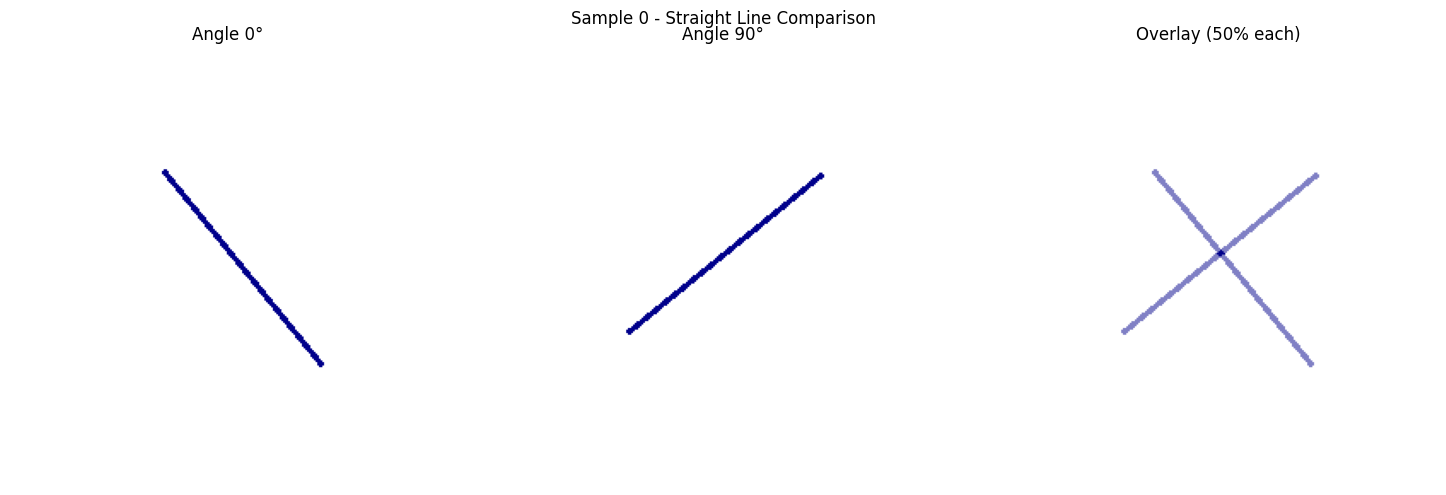

  Comparing 0° vs 180°


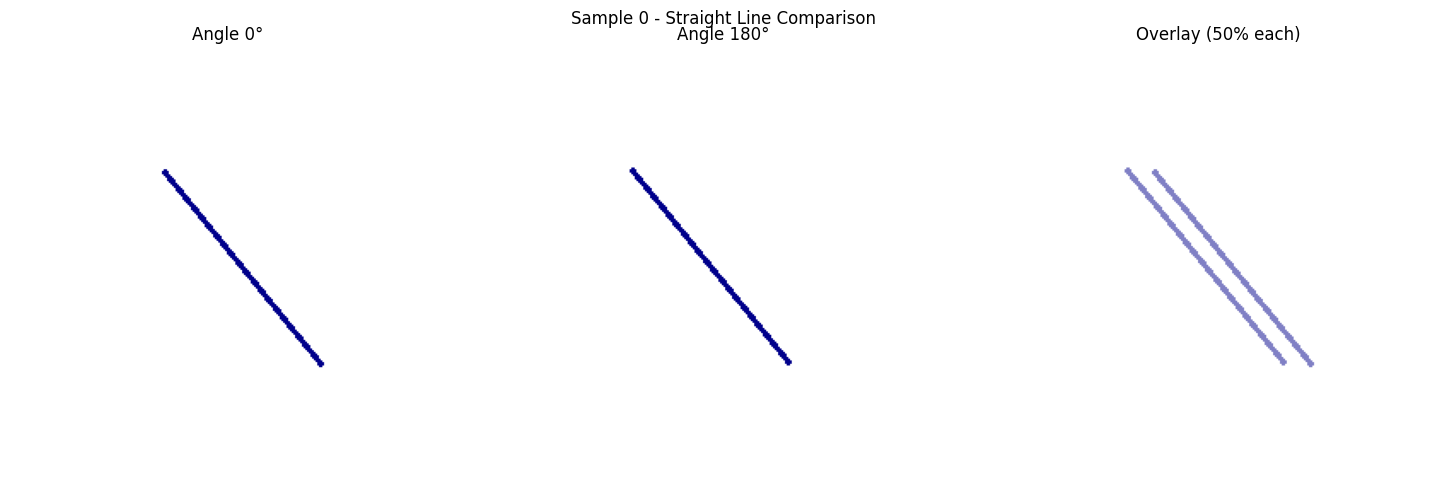

  Comparing 45° vs 135°


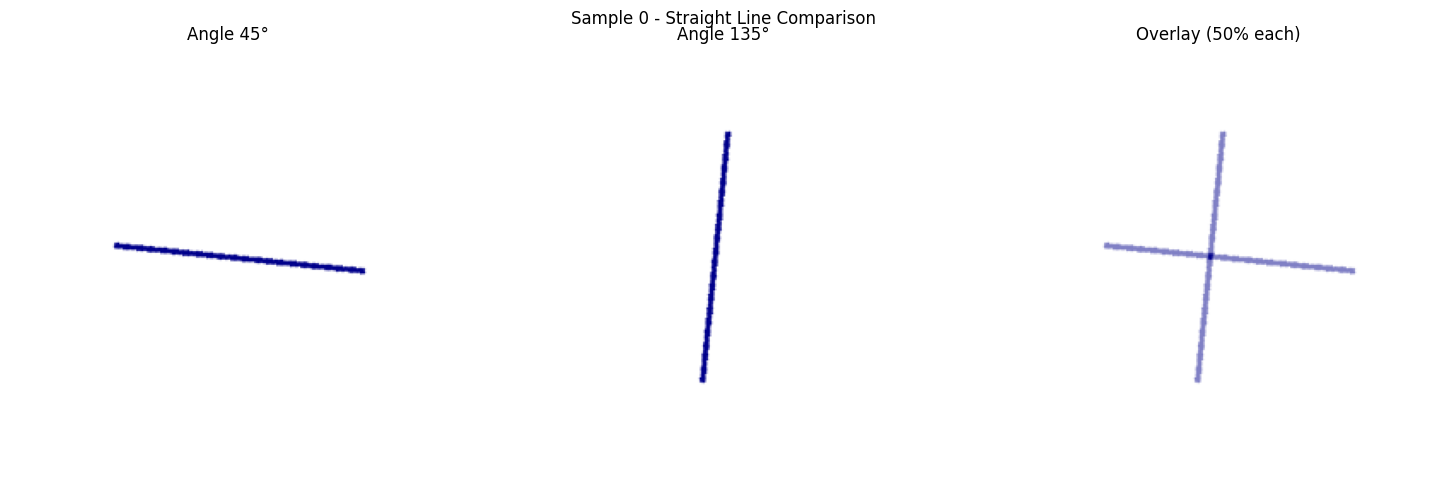

  Comparing 30° vs 210°


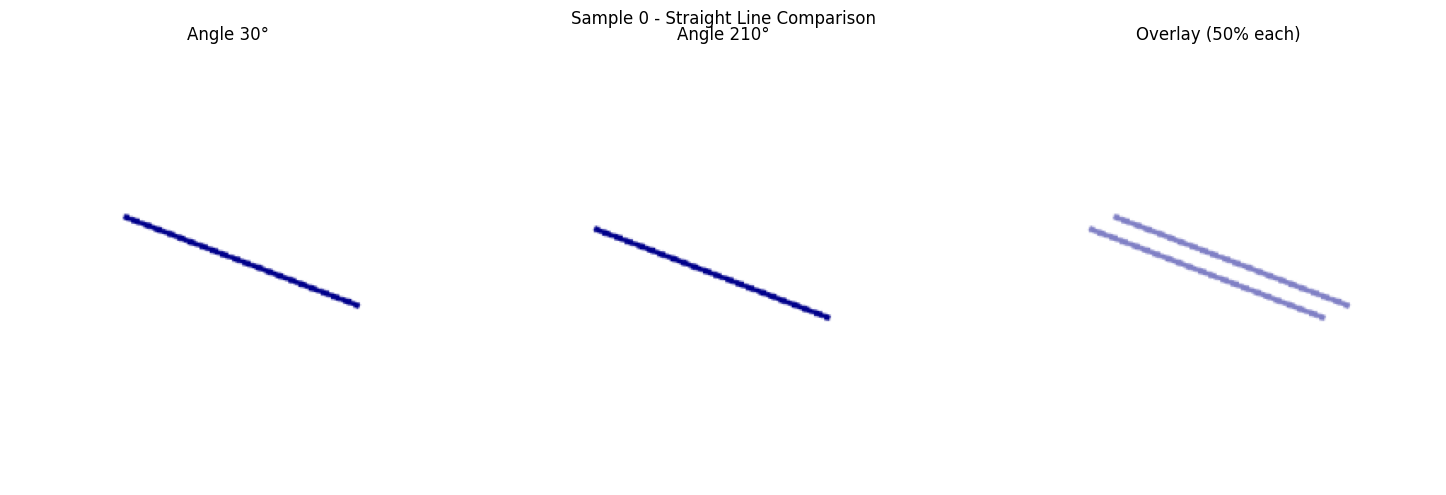


Testing curved line overlays:
  Comparing 0° vs 90°


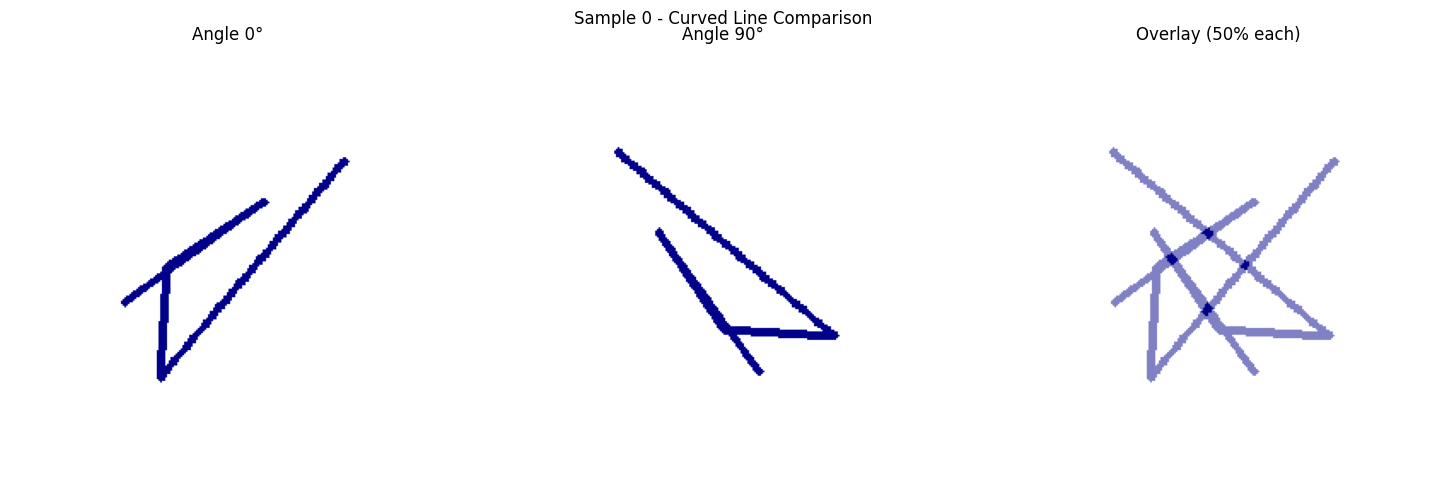

  Comparing 0° vs 180°


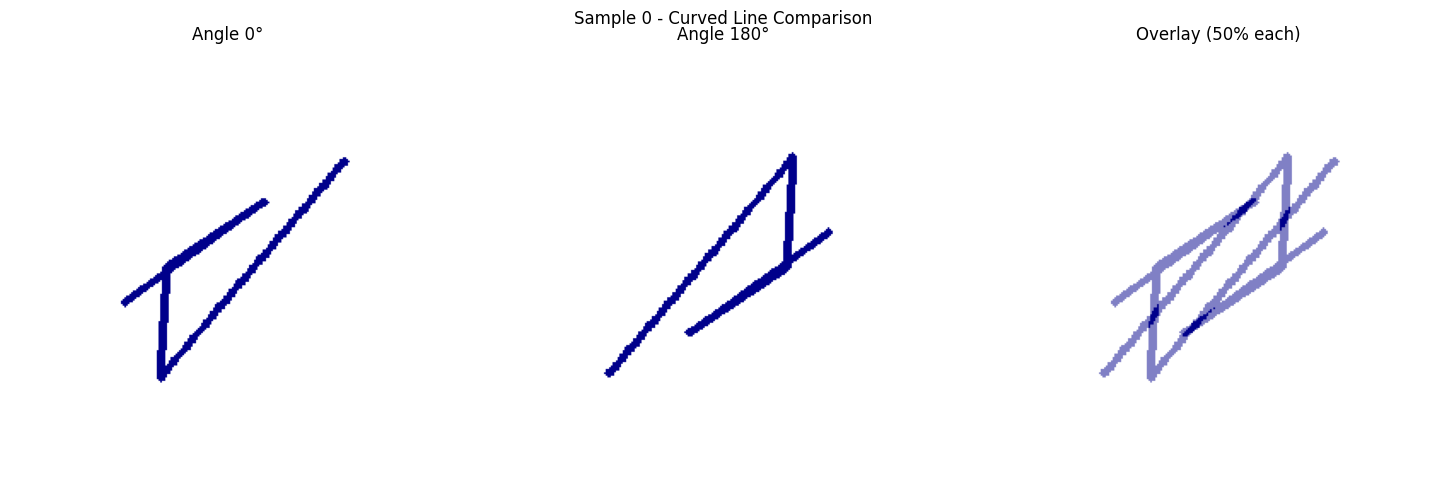

  Comparing 45° vs 135°


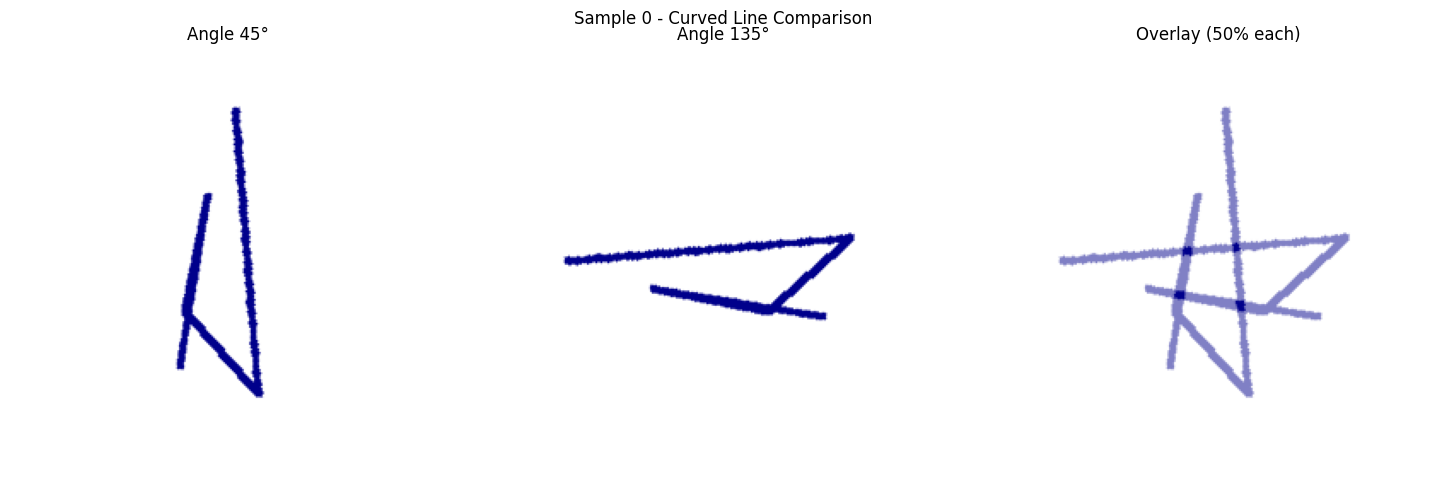

  Comparing 30° vs 210°


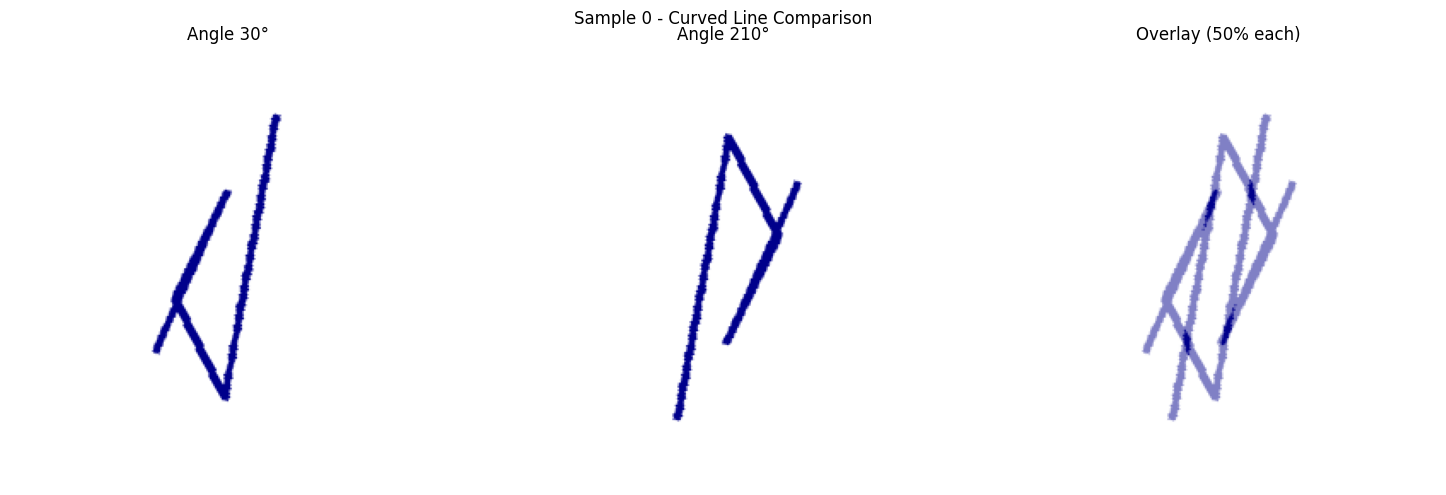


Testing wavy line overlays:
  Comparing 0° vs 90°


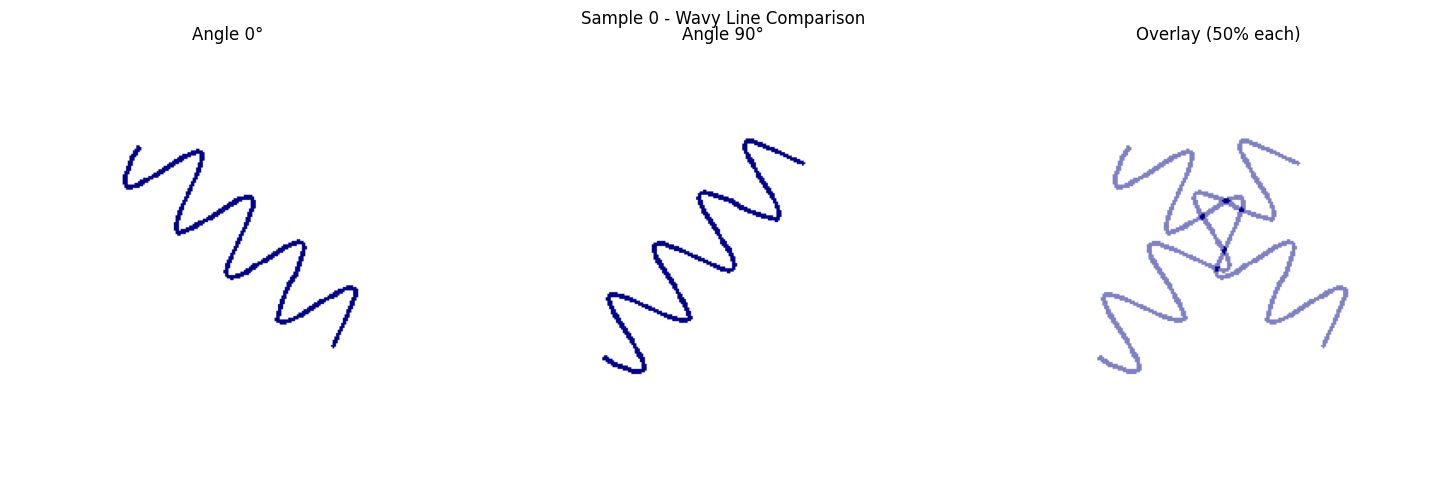

  Comparing 0° vs 180°


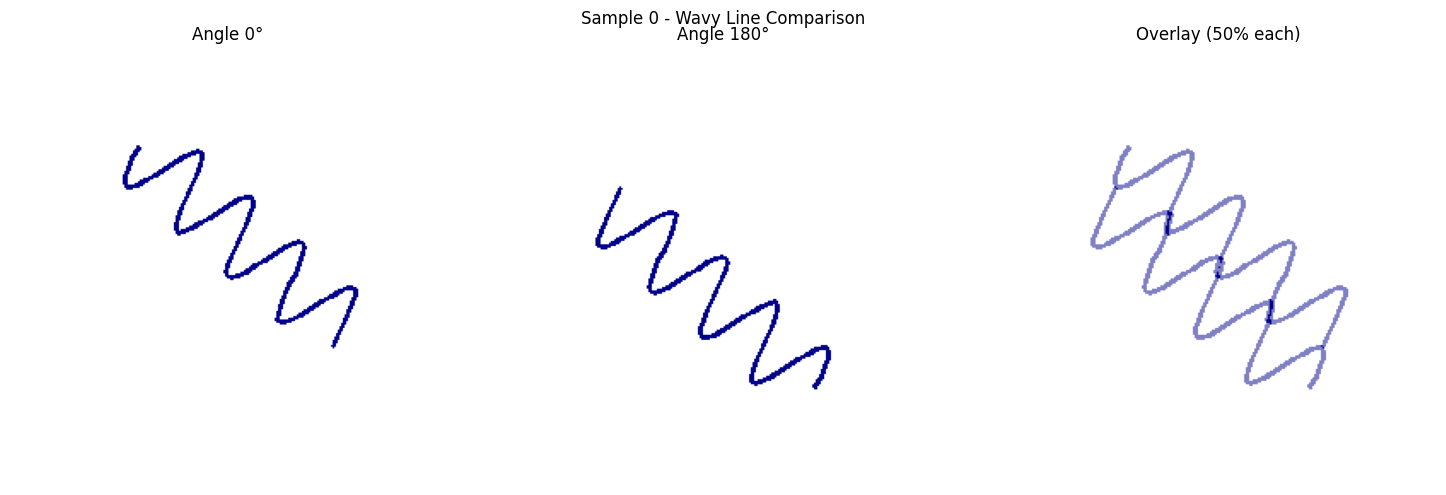

  Comparing 45° vs 135°


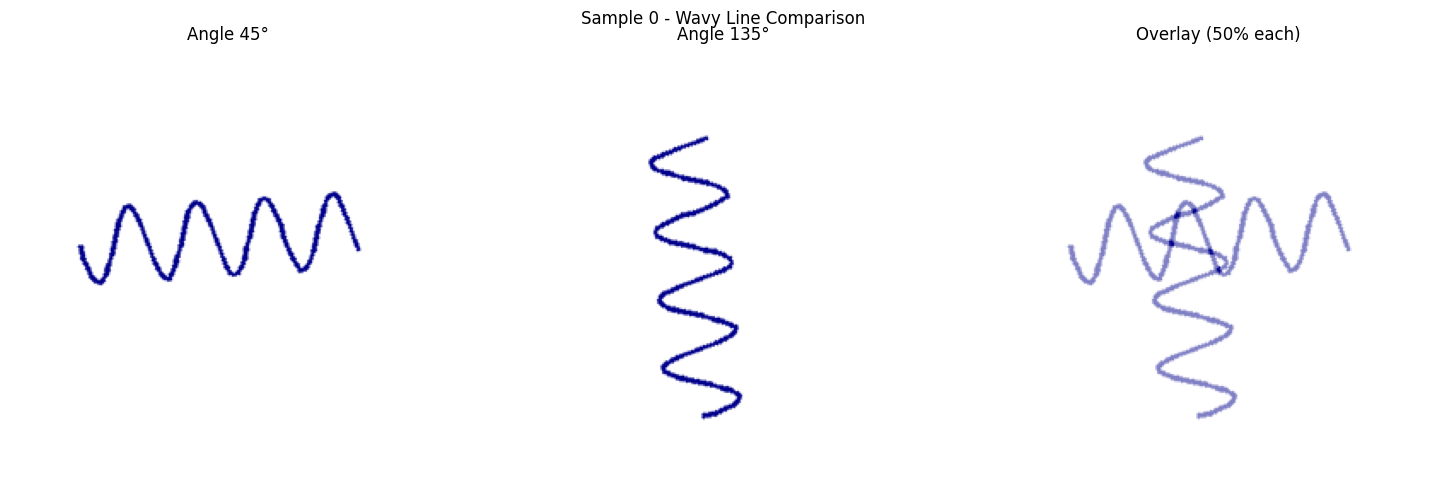

  Comparing 30° vs 210°


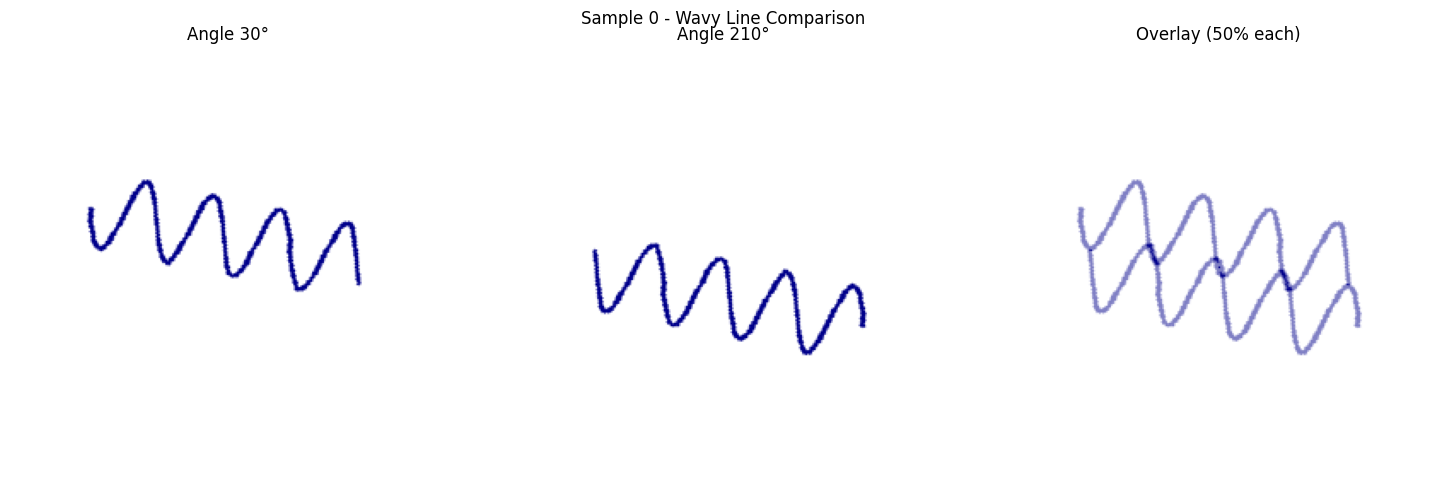


Testing ragged line overlays:
  Comparing 0° vs 90°


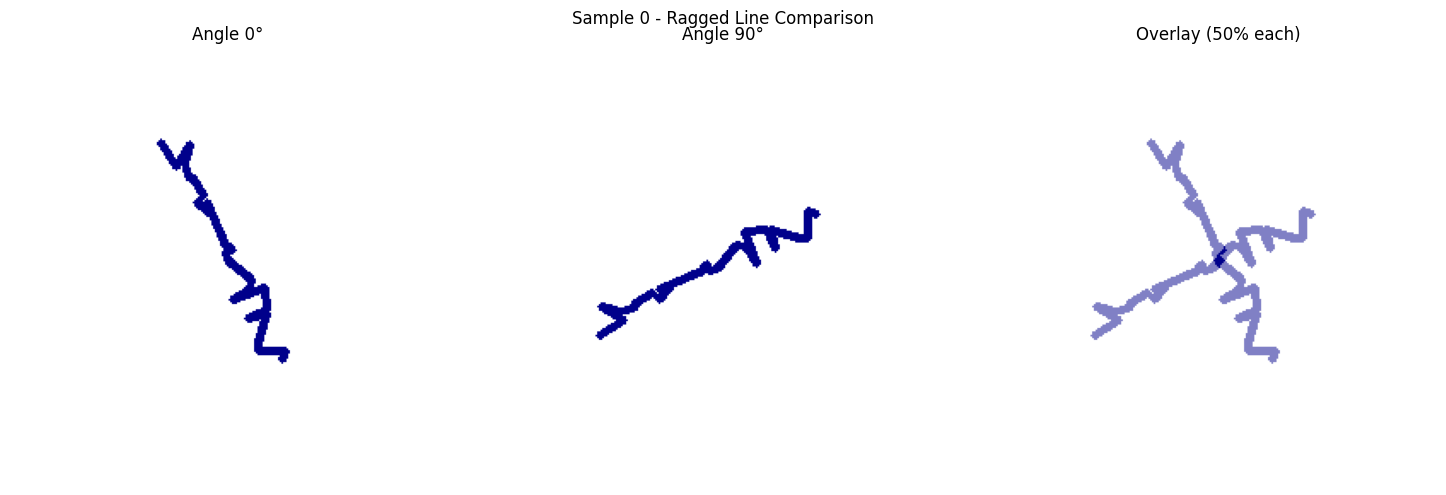

  Comparing 0° vs 180°


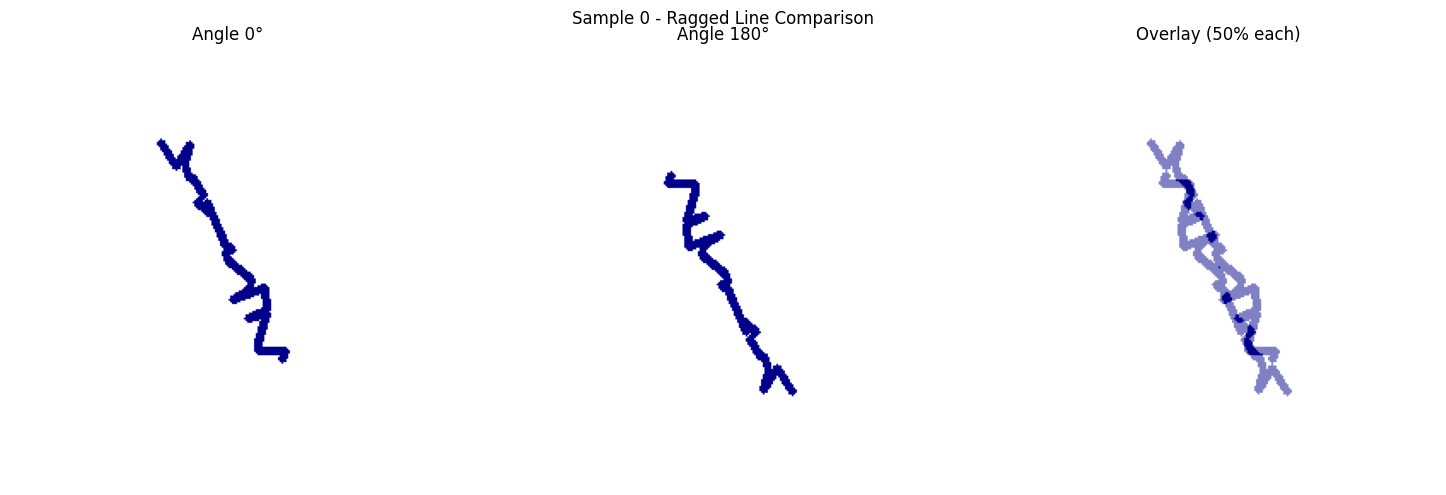

  Comparing 45° vs 135°


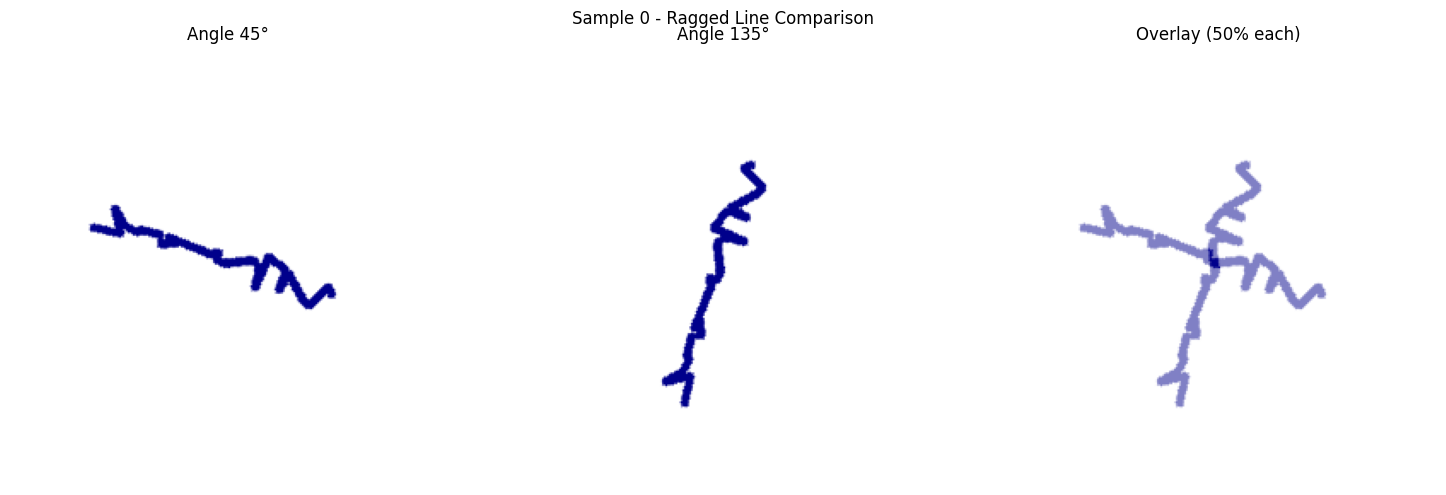

  Comparing 30° vs 210°


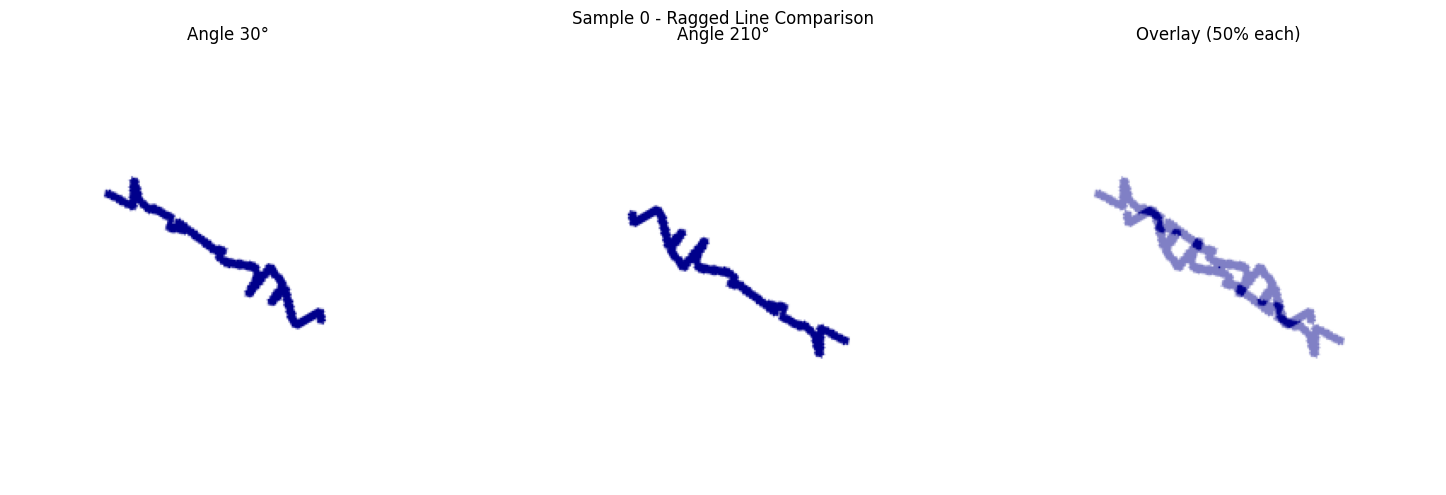


Testing looped line overlays:
  Comparing 0° vs 90°


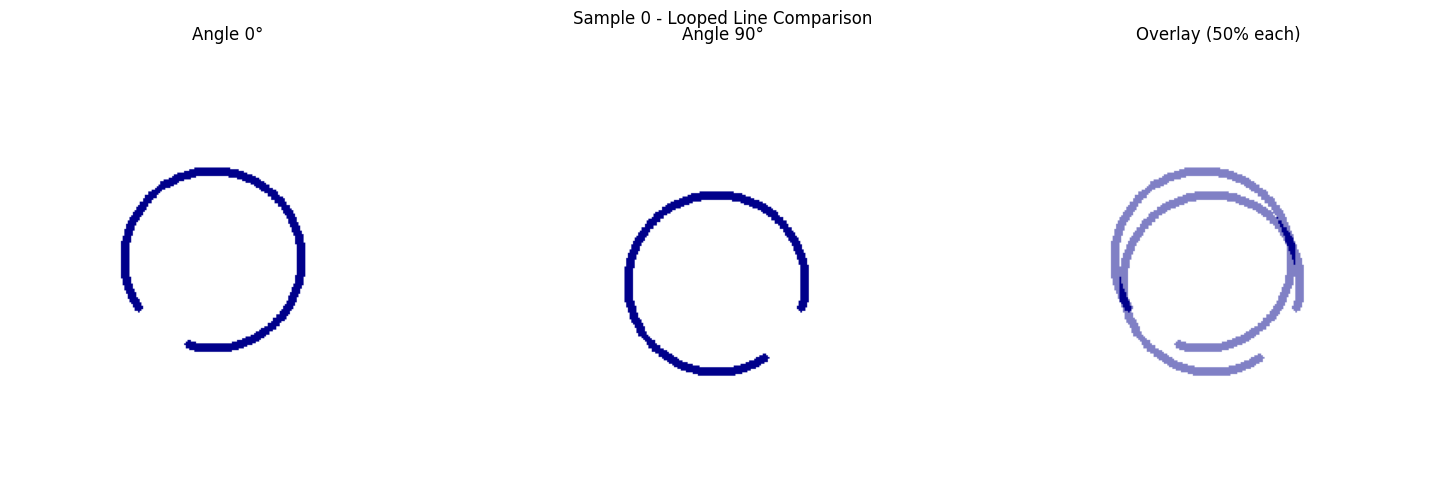

  Comparing 0° vs 180°


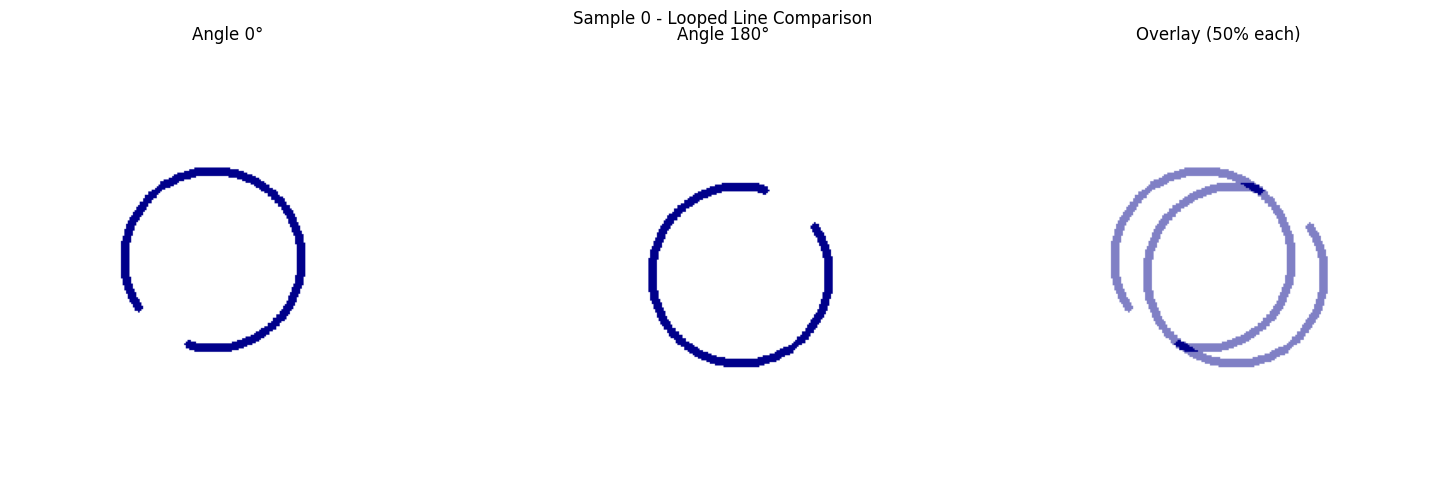

  Comparing 45° vs 135°


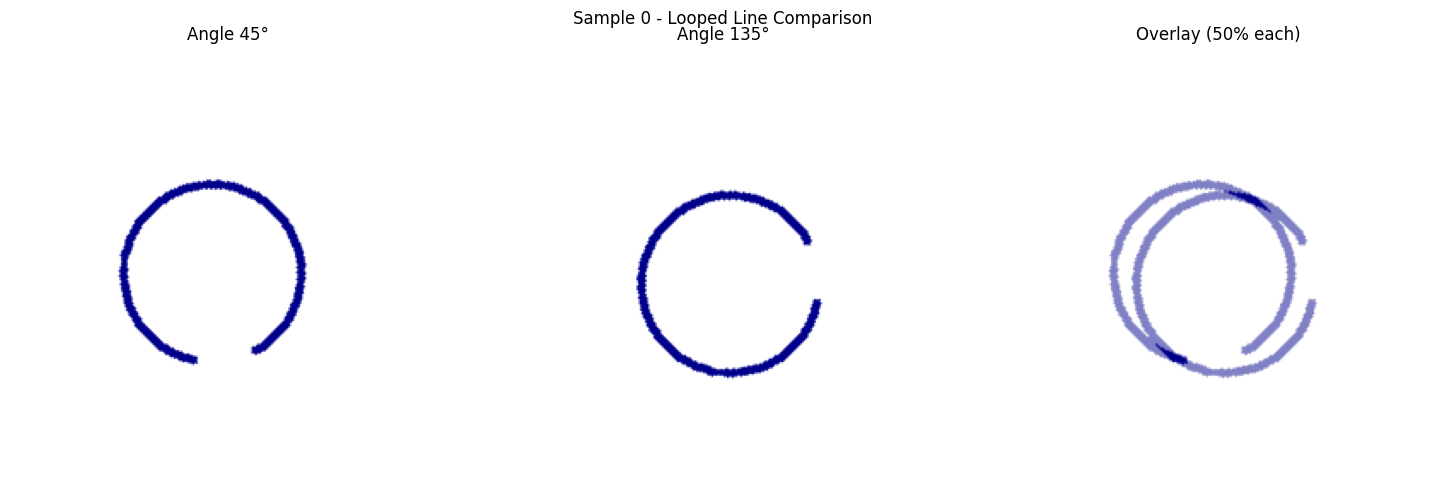

  Comparing 30° vs 210°


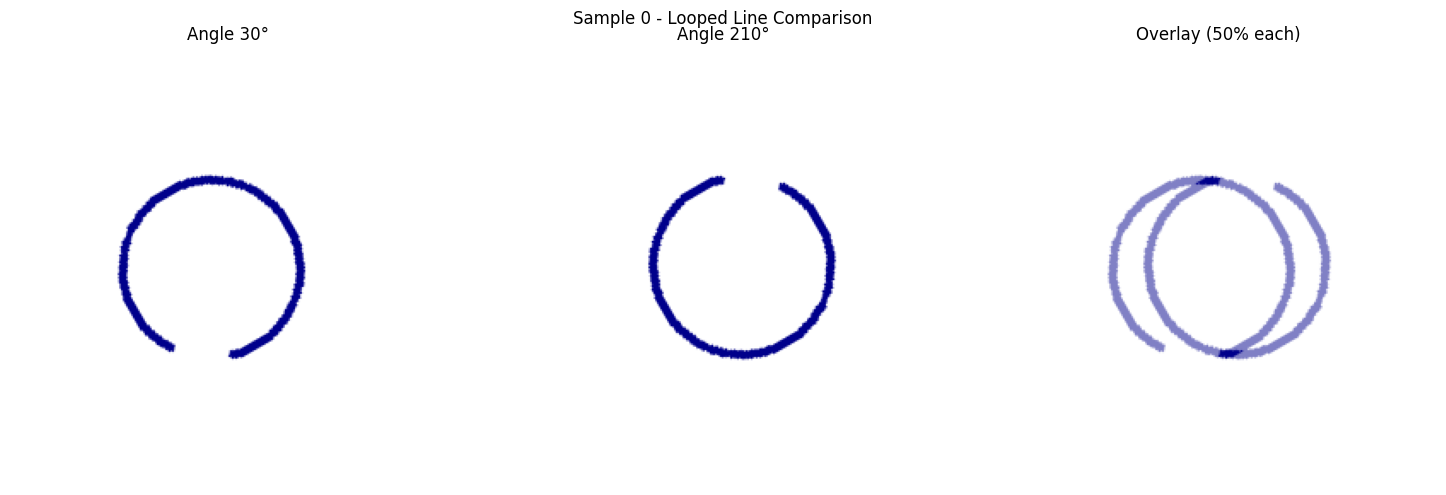

In [7]:
# Test specific rotation comparisons for overlay analysis
print("Testing rotation comparisons for overlay analysis...")

# Initialize components
line_gen = LineGenerator()
dataset_gen = DatasetGenerator(line_gen)
visualizer = Visualizer()

# Generate a focused dataset with smaller rotation steps for better analysis
print("Generating dataset with 15-degree rotation steps...")
focused_dataset = dataset_gen.generate_mixed_dataset(samples_per_type=1, rotation_step=15)

# Test overlay comparisons for different line types
line_types = ['straight', 'curved', 'wavy', 'ragged', 'looped']
angles_to_test = [(0, 90), (0, 180), (45, 135), (30, 210)]

for line_type in line_types:
    print(f"\nTesting {line_type} line overlays:")
    for angle1, angle2 in angles_to_test:
        print(f"  Comparing {angle1}° vs {angle2}°")
        visualizer.plot_overlay_comparison(focused_dataset, sample_id=0, line_type=line_type, 
                                         angle1=angle1, angle2=angle2)


Generating fine-grained rotation dataset for detailed analysis...
Generated 360 samples with 1-degree rotation steps

Showing straight line rotations every 30 degrees:


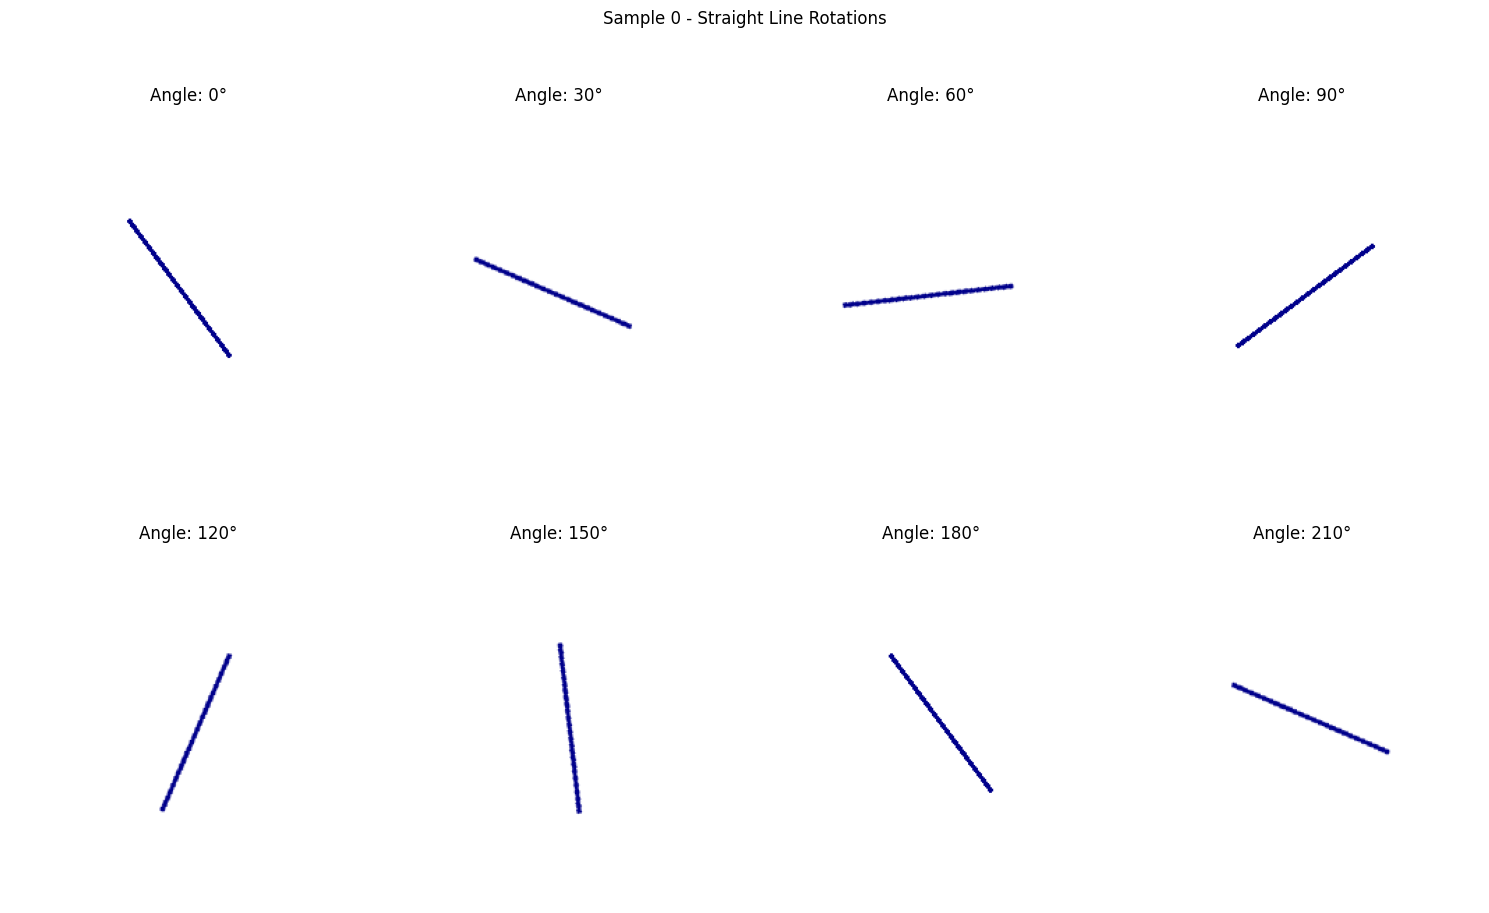


Testing overlay with very similar angles (0° vs 1°):


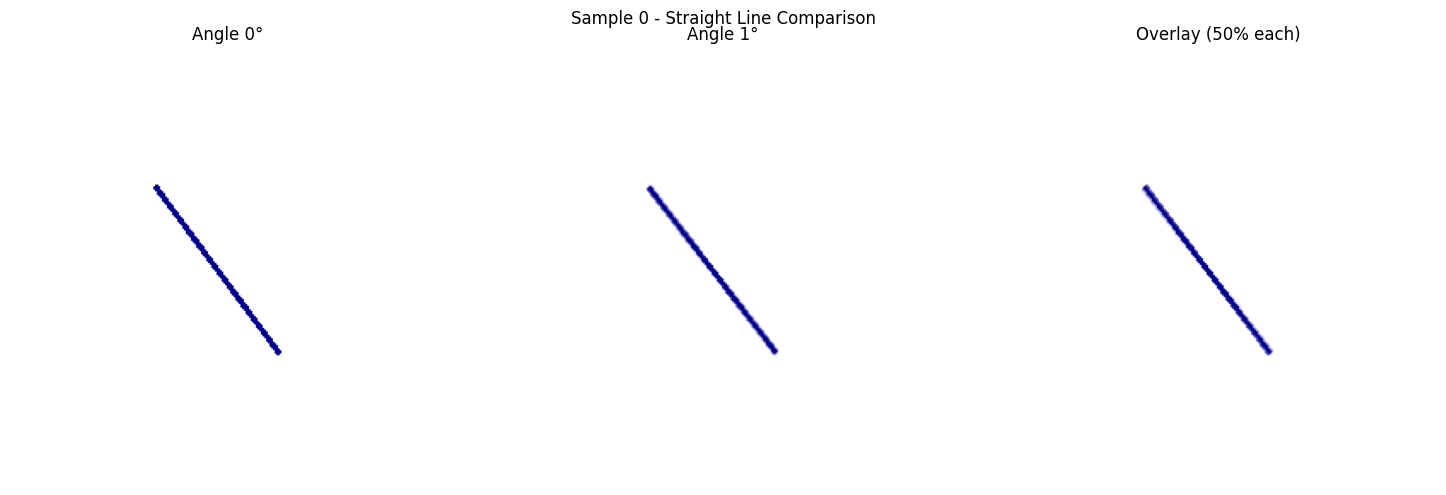


Testing overlay with 90-degree difference (0° vs 90°):


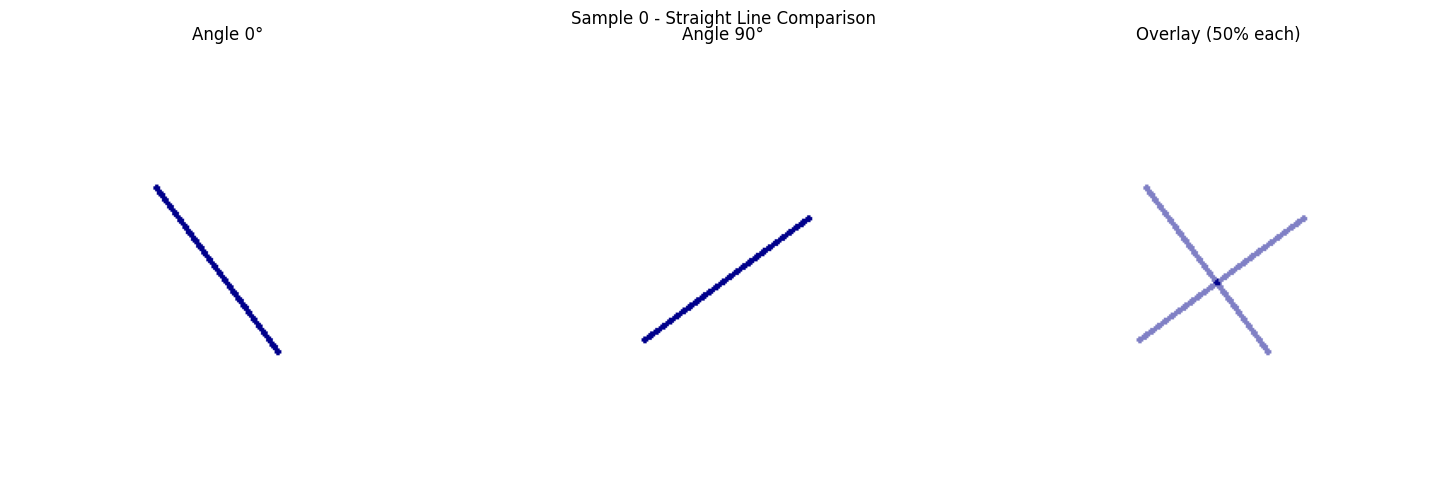

In [8]:
# Demonstrate fine-grained rotation analysis (1-degree steps for critical analysis)
print("Generating fine-grained rotation dataset for detailed analysis...")

# Generate a single line type with 1-degree rotation steps
fine_dataset = dataset_gen.generate_straight_line_dataset(num_samples=1, rotation_step=1)

print(f"Generated {len(fine_dataset)} samples with 1-degree rotation steps")

# Show a subset of rotations for a straight line
print("\nShowing straight line rotations every 30 degrees:")
visualizer.plot_sample_rotations(fine_dataset, sample_id=0, line_type='straight', max_angles=12)

# Test overlay comparison with very similar angles
print("\nTesting overlay with very similar angles (0° vs 1°):")
visualizer.plot_overlay_comparison(fine_dataset, sample_id=0, line_type='straight', angle1=0, angle2=1)

print("\nTesting overlay with 90-degree difference (0° vs 90°):")
visualizer.plot_overlay_comparison(fine_dataset, sample_id=0, line_type='straight', angle1=0, angle2=90)


In [ ]:
import cv2

def save_dataset(dataset, output_dir="../data"):
    """Save generated dataset to files"""
    import os
    from pathlib import Path
    
    output_path = Path(output_dir)
    output_path.mkdir(exist_ok=True)
    
    # Create subdirectories for each line type
    for line_type in ['straight', 'curved', 'wavy', 'ragged', 'looped']:
        (output_path / line_type).mkdir(exist_ok=True)
    
    for i, sample in enumerate(dataset):
        line_type = sample['line_type']
        angle = sample['angle']
        sample_id = sample['sample_id']
        
        filename = f"sample_{sample_id}_angle_{angle:03d}.png"
        filepath = output_path / line_type / filename
        
        # Convert BGR to RGB for saving
        img_rgb = cv2.cvtColor(sample['image'], cv2.COLOR_BGR2RGB)
        plt.imsave(filepath, img_rgb)
    
    print(f"Dataset saved to {output_path}")
    return output_path

# Save a small dataset
print("Saving a small sample dataset...")
small_dataset = dataset_gen.generate_mixed_dataset(samples_per_type=1, rotation_step=45)
save_dataset(small_dataset)


Saving a small sample dataset...
Dataset saved to ..\data


WindowsPath('../data')